# Introduction

According to the World Health Organization (WHO), Stroke is the second cause of death worldwide. It is a high morbidity, disability and mortality disease and whose victims may suddenly experience paralysis, impaired speed, or loss of vision due to the interruption of blood flow(ischemia) caused by thrombosis and embolism. 
Although  the pathogenesis of Stroke is not quite clear, it is known to be closely related to abnormal metabolic indicators, of which 90% can be controlled. This is why predicting stroke can be determining for the individuals to be treated earlier and avoid disabling and mortal consequences.

# Objective

The purpose of this research is to apply Data Science and Machine Learning techniques to create an accurate model based on Stroke dataset to preduct stroke outcome from knowing some individuals characteristics and provide useful information of whether a person is susceptible to stroke and help medical staff to take required actions to lower the existing risk and avoid its consequences.

# Methodology

The methodology to be used for this study is the CRISP-DM methodology, one of the most widely used methodology for  Data Analysis projects. It consists in 6 principal stages listed as follows:
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

# 1. Business Understanding 

This first stage of the CRISP-DM methodology aims for the data analyst to understand the business and the problem to be solved in order to take the required actions while analyzing the available data.
In this case, we are talking about the medicine field. Which is one of the areas where Data Science is getting a considering importance because of its efficiency and accuracy. As we are helping to detect a mortal disease, it is very important that the dataset is managed the best possible and evaluate the cost of getting wrong predictions (false positives and false negatives) in order to decide what to do in these scenarios.

# 2. Data Understanding

The Stroke Prediction Dataset used for this investigation was retrieved Kaggle and can be obtained from the follwing link:
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Now let´s see what kind of information it contains and identify how it can be used for the previously described objective.

In [1]:
# Import required libraries to import and manipulate dataset
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

## Reading Data

In [2]:
# Read the data in "Stroke" dataset
ds= pd.read_csv("Stroke_dataset.csv")
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Feature Description

We can see that the dataset contains information about 5110 individuals, and the features included are:
- id: Individual identifier
- gender: Individual gender
- age: Age of the individual
- hypertension: Indicates whether a person has hyperthension or not
- heat disease: Indicates wheter the person suffers from heart disease
- ever married: Indicates if the person has been married
- work type: Individual work type
- residence type: Type of residence the person has
- Average glucose level: Average glucose level of the individual
- bmi: Individual body mass index 
- Smoking status: Indicates the smoking status
- Stroke: stroke outcome of individuals within the dataset

## Missing Data and Dropping 'id'

First of all, we can get rid of information that is not required such as the 'id', which is not more that an individual identifier and provides no useful information in this case.

In [3]:
ds.drop(['id'],axis=1, inplace=True)
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Now let´s check if we have any missing information within the dataset.

In [4]:
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We are missing BMI for 201 individuals. We can fill this missing data by using the mean.

In [5]:
# Calculating BMI mean to fill missing values
bmimean = ds['bmi'].mean()
print(bmimean)

28.893236911794673


In [6]:
# Check for missing data again
ds = ds.fillna(bmimean)
ds.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now that we have no more missing data, let´s see some description about it to identify what kinf of information we are dealing with and some useful statistics about it, as well as the type of data for each of the features described

In [7]:
ds.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Description of data
ds.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


From the description, we can identify the values ranges for numerical features, which are: age, bmi and glucose level:
- age: 0.08 - 82 years
- average glucose level: 55.12 - 271.74
- BMI: 10.3 - 97.6

It might be better to round the ages we are more used to use it that way

In [9]:
# Rounding Age
ds['age'] = ds['age'].apply(lambda x: round(x))

We also have both cathegorical and binary features, so we might take a look on their possible values to understand better the information they provide.

In [10]:
print(ds['gender'].unique())
print(ds['hypertension'].unique())
print(ds['heart_disease'].unique())
print(ds['ever_married'].unique())
print(ds['work_type'].unique())
print(ds['Residence_type'].unique())
print(ds['smoking_status'].unique())
print(ds['stroke'].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


## Gender classification

We can see that we have 'Other' values in gender feature. Let´s see how many of them appear within the dataset and see if we can classify them

In [11]:
ds.gender.value_counts(normalize=False)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

As we have only one individual with this classification, we can change it as we want with no important effect. In this case, it was decided to change it to Male

In [12]:
ds.loc[ds['gender'] == 'Other', 'gender'] = 'Male'
ds.gender.value_counts(normalize=False)

Female    2994
Male      2116
Name: gender, dtype: int64

## Work type assumption

Another thing that it was decided to do, is to include the 'children' work type into the 'never_worked' classification. Although this last one may refer to adults (not children) that have never worked, this is information that is also included in the 'age' feature, so combining them can be acceptable.

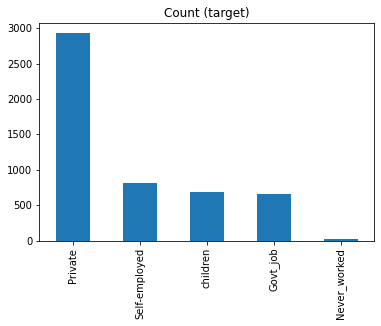

In [13]:
ds.work_type.value_counts().plot(kind='bar', title='Count (target)');

In [14]:
ds.loc[ds['work_type'] == 'children','work_type'] = 'Never_worked'

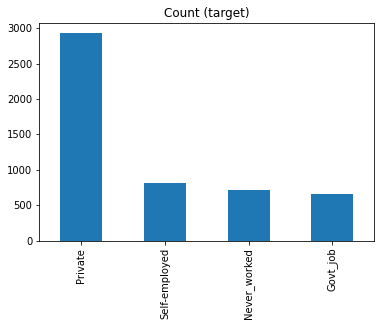

In [15]:
ds.work_type.value_counts().plot(kind='bar', title='Count (target)');

## Unknown smoking status

About smoking status, we can see that there is a high amount of individuals as an unknown smoking status. Almost half of individuals within the dataset is classified this way, which may create some noise for evaluating the impact of this feature with the target variable.

In [16]:
ds.smoking_status.value_counts(normalize=False)

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

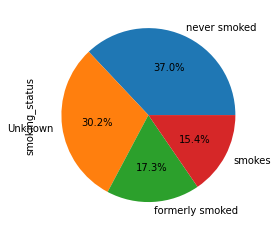

In [17]:
ds.smoking_status.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

One thing we can do is to change some of this value based on some realistinc assumptions. In this case, it was decided to re-classify some of these individuals by age, as it is less likely for young people to smoke. First, lets check how many young people is defined as 'smokes' or 'formerly smoked'

In [18]:
ds.loc[(ds['age'] < 18) & (ds['smoking_status'] == 'smokes'),['age','smoking_status']]

,age,smoking_status
762,17,smokes
1063,13,smokes
1512,12,smokes
2013,10,smokes
2181,17,smokes
2950,17,smokes
3496,16,smokes
4391,16,smokes
4793,17,smokes


In [19]:
ds.loc[(ds['age'] < 18) & (ds['smoking_status'] == 'formerly_smoked'),['age','smoking_status']]

,age,smoking_status


We can see that there is only 9 people with less than 18 years that smoke. Although the number of people is not zero, it is a very tiny population compared to the dataset, so we decided to re-classify the people younger than 16 smoking status to 'never smoked'

In [20]:
ds.loc[(ds['age'] < 16) & (ds['smoking_status'] == 'Unknown'),'smoking_status'] = 'never smoked'

In [21]:
ds.smoking_status.value_counts(normalize=False)

never smoked       2527
Unknown             909
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

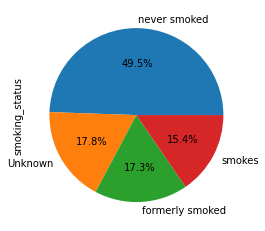

In [22]:
ds.smoking_status.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

We can see that we have reduced unknowns from 1544 to 909, which seems to have been a good assumption. Nevertheless, the number is to high and  may affect the way this features seems to relate to stroke.

In [23]:
ds = ds[ds['smoking_status'] != 'Unknown']

In [24]:
ds.smoking_status.value_counts(normalize=False)

never smoked       2527
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

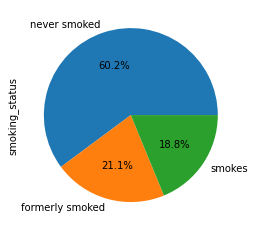

In [25]:
ds.smoking_status.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

In [26]:
ds.shape

(4201, 11)

In [27]:
ds

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,Never_worked,Rural,103.08,18.600000,never smoked,0
5105,Female,80,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0


## Exploratory Data Analysis

### Count Plots for Categorical Features

In [28]:
# Age values to ranges for plotting
ranges = [0, 18, 30, 40, 50, 60, 70, np.inf]
labels = ['0-18','18-30', '30-40', '40-50', '50-60', '60-70', '70+']

ages = pd.cut(ds['age'], bins=ranges, labels=labels)

Text(0.5, 1.0, 'Title')

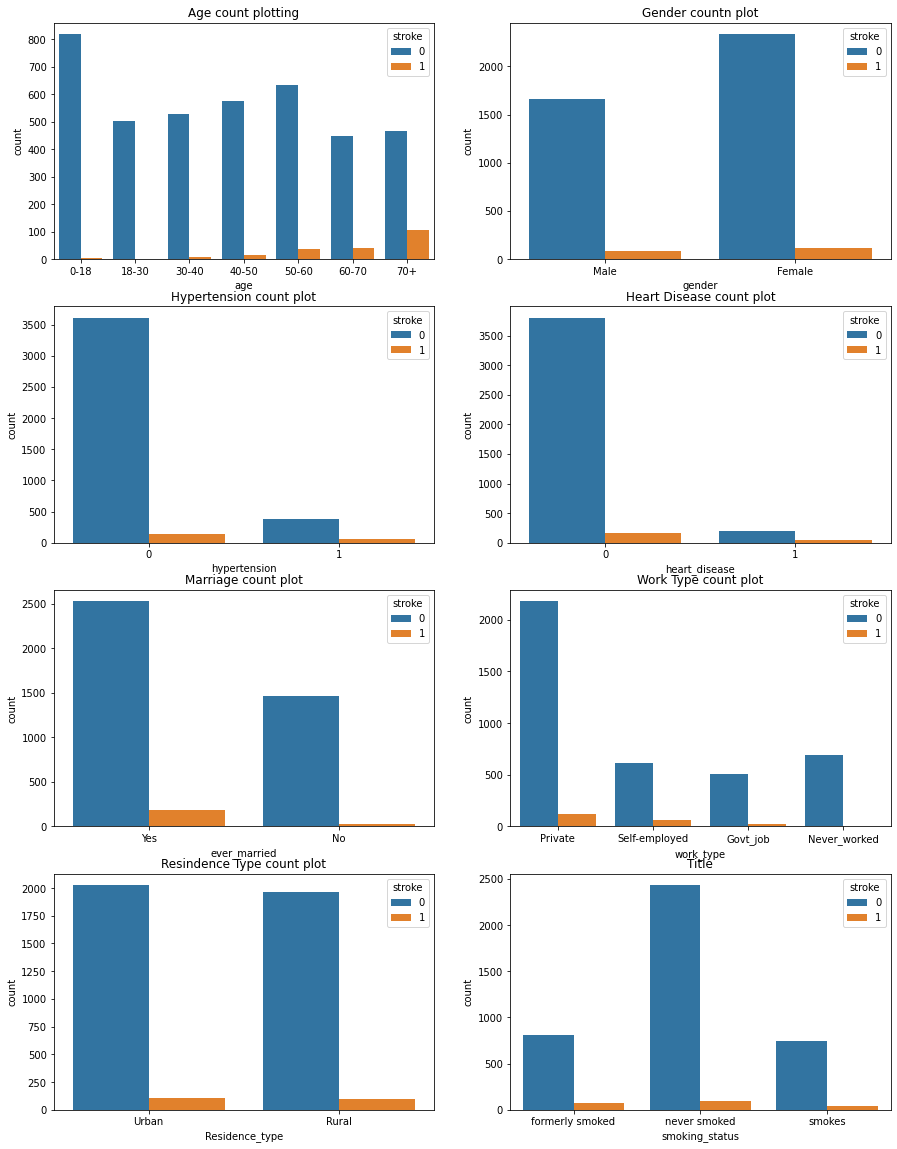

In [29]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

sns.countplot(ax=axes[0,0], x= ages ,hue='stroke',data=ds).set_title('Age count plotting')
sns.countplot(ax=axes[0,1], x='gender',hue='stroke',data=ds).set_title('Gender countn plot')
sns.countplot(ax=axes[1,0], x='hypertension',hue='stroke',data=ds).set_title('Hypertension count plot')
sns.countplot(ax=axes[1,1], x='heart_disease',hue='stroke',data=ds).set_title('Heart Disease count plot')
sns.countplot(ax=axes[2,0], x='ever_married',hue='stroke',data=ds).set_title('Marriage count plot')
sns.countplot(ax=axes[2,1], x='work_type',hue='stroke',data=ds).set_title('Work Type count plot')
sns.countplot(ax=axes[3,0], x='Residence_type',hue='stroke',data=ds).set_title('Resindence Type count plot')
sns.countplot(ax=axes[3,1], x='smoking_status',hue='stroke',data=ds).set_title('Title')

Conclusions from Count Plots:
- The dataset is highly unbalanced
- Age seems to be related to stroke, as we can see that older people is more likely from suffering from it

Text(0.5, 1.0, 'Age vs Ever Married')

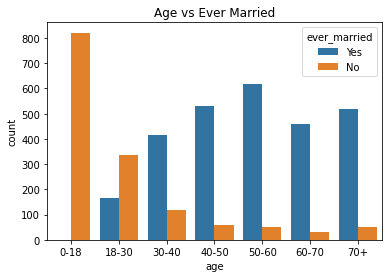

In [30]:
sns.countplot(x=ages ,hue='ever_married',data=ds).set_title('Age vs Ever Married')

## Unbalanced Dataset

In [31]:
ds.stroke.value_counts(normalize=False)

0    3997
1     204
Name: stroke, dtype: int64

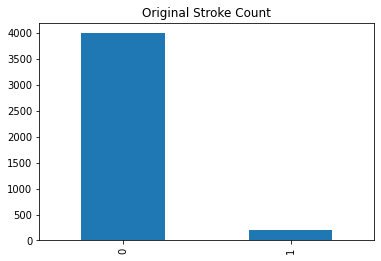

In [32]:
ds.stroke.value_counts().plot(kind='bar', title='Original Stroke Count');

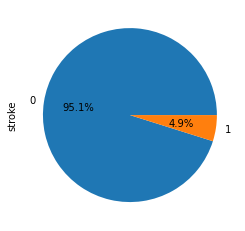

In [33]:
ds.stroke.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

We can see that the target variable is Nevative (0) only for the 4.9% of the population. So, resampling the data might be necessary so that we can appreciate the relationship between the features and the target variable. There are two principal ways on doing so. Either we downsample the stroke=0 condition or we oversample the stroke=1 condition

## Random under-sampling

In [34]:
# Class count
count_class_0, count_class_1 = ds.stroke.value_counts()

# Divide by class
ds_class_0 = ds[ds['stroke'] == 0]
ds_class_1 = ds[ds['stroke'] == 1]

Random under-sampling:
1    204
0    204
Name: stroke, dtype: int64


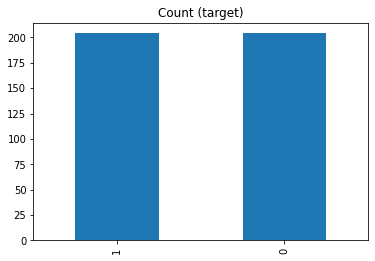

In [35]:
ds_class_0_under = ds_class_0.sample(count_class_1)
ds_under = pd.concat([ds_class_0_under, ds_class_1], axis=0)

print('Random under-sampling:')
print(ds_under.stroke.value_counts())

ds_under.stroke.value_counts().plot(kind='bar', title='Count (target)');

## Violin Plots

Now lets see what violin Plots can help us to detect with one of this balanced dataset. For this case, we are going to use the under sampled dataset

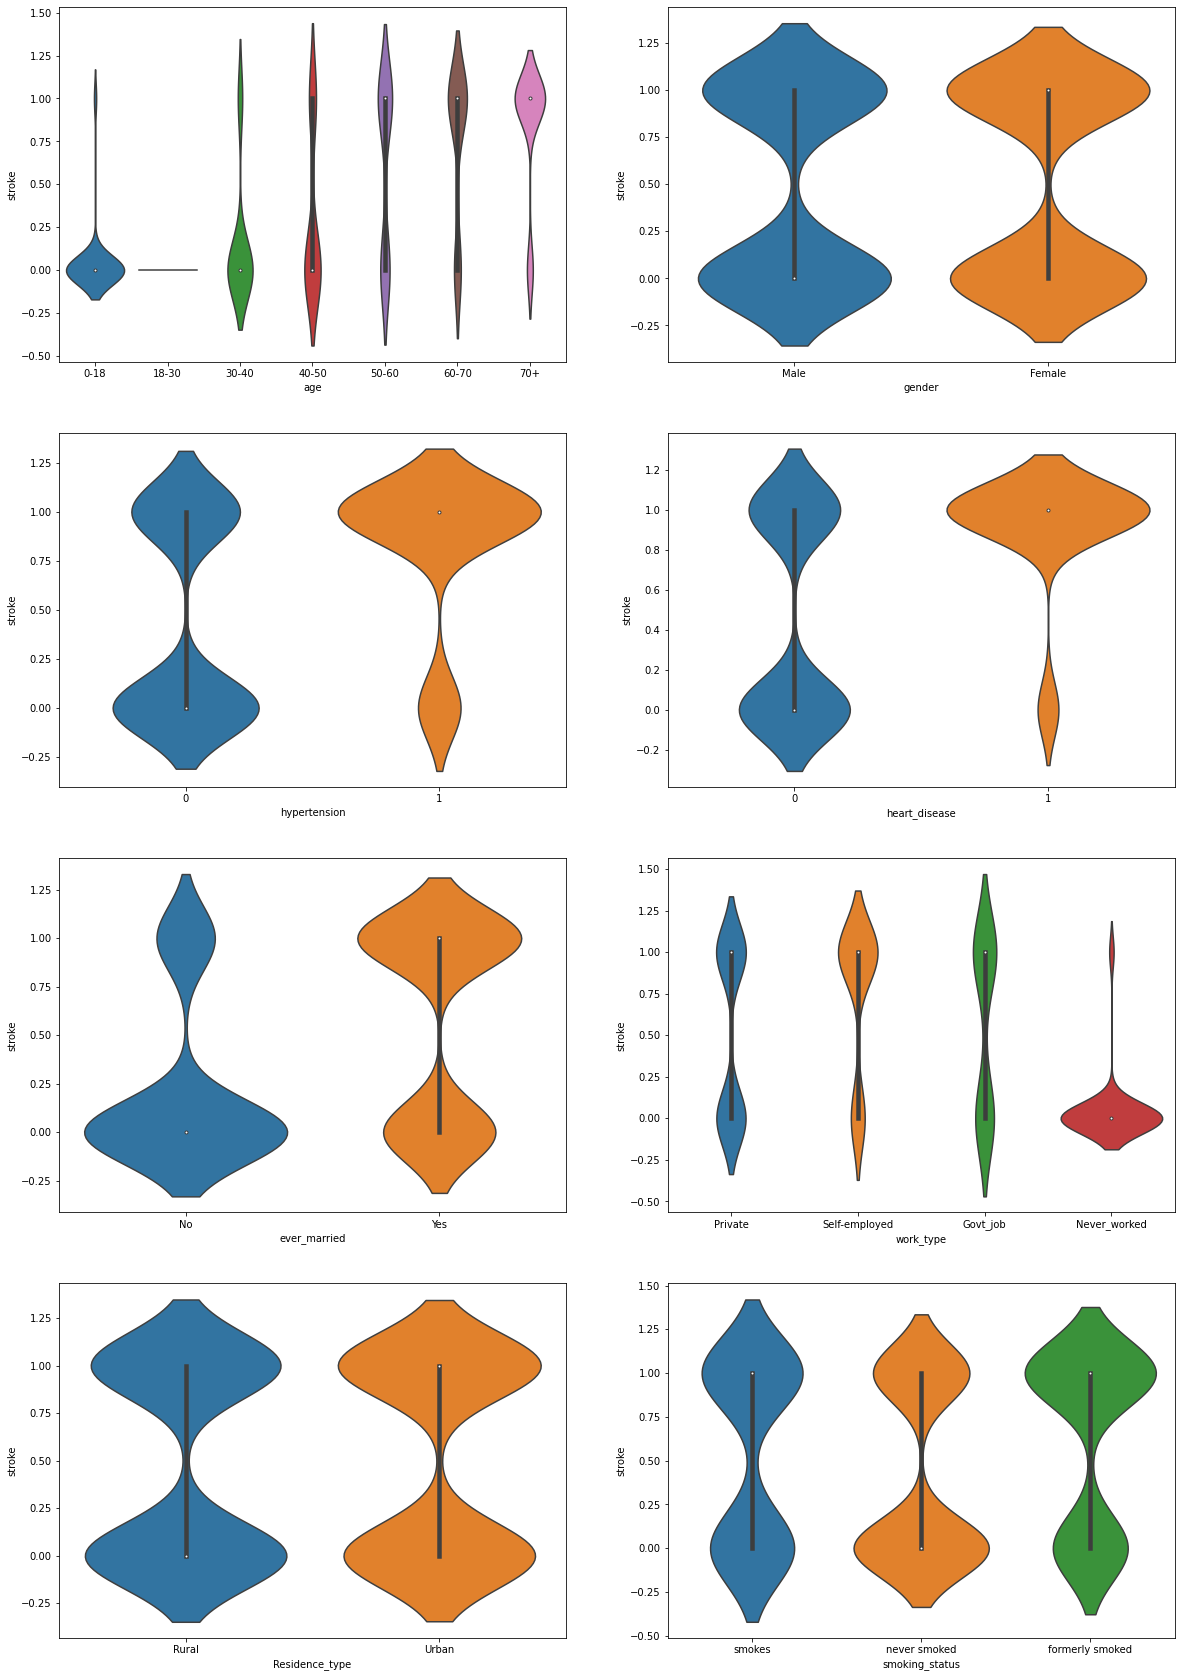

In [36]:
ages = pd.cut(ds_under['age'], bins=ranges, labels=labels)
fig, axes = plt.subplots(4, 2, figsize=(20, 30))

sns.violinplot(ax=axes[0,0], x=ages, y='stroke', data=ds_under, title='prueba')
sns.violinplot(ax=axes[0,1], x='gender', y='stroke', data=ds_under, title='prueba')
sns.violinplot(ax=axes[1,0], x='hypertension', y='stroke', data=ds_under)
sns.violinplot(ax=axes[1,1], x='heart_disease', y='stroke', data=ds_under)
sns.violinplot(ax=axes[2,0], x='ever_married', y='stroke', data=ds_under)
sns.violinplot(ax=axes[2,1], x='work_type', y='stroke', data=ds_under)
sns.violinplot(ax=axes[3,0], x='Residence_type', y='stroke', data=ds_under)
sns.violinplot(ax=axes[3,1], x='smoking_status', y='stroke', data=ds_under)

plt.show()

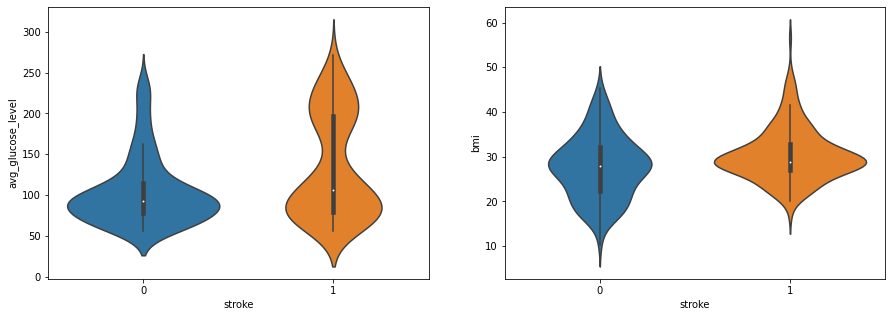

In [37]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
sns.violinplot(ax=axes[0], x=ds_under["stroke"], y=ds_under["avg_glucose_level"])
sns.violinplot(ax=axes[1], x=ds_under["stroke"], y=ds_under["bmi"])
plt.show()

## Random Over-sampling

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
ds['gender'] = le.fit_transform(ds['gender'])
ds['ever_married'] = le.fit_transform(ds['ever_married'])
ds['work_type'] = le.fit_transform(ds['work_type'])
ds['Residence_type'] = le.fit_transform(ds['Residence_type'])
ds['smoking_status'] = le.fit_transform(ds['smoking_status'])

In [40]:
print(ds['gender'].unique())
print(ds['hypertension'].unique())
print(ds['heart_disease'].unique())
print(ds['ever_married'].unique())
print(ds['work_type'].unique())
print(ds['Residence_type'].unique())
print(ds['smoking_status'].unique())
print(ds['stroke'].unique())

[1 0]
[0 1]
[1 0]
[1 0]
[2 3 0 1]
[1 0]
[0 1 2]
[1 0]


In [41]:
# Class count
count_class_0, count_class_1 = ds.stroke.value_counts()

# Divide by class
ds_class_0 = ds[ds['stroke'] == 0]
ds_class_1 = ds[ds['stroke'] == 1]

Random over-sampling:
1    3997
0    3997
Name: stroke, dtype: int64


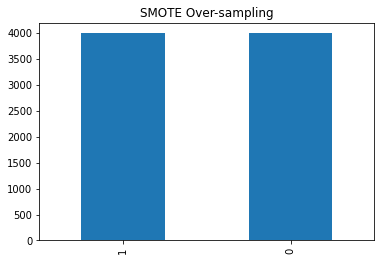

In [42]:
ds_class_1_over = ds_class_1.sample(count_class_0, replace=True)
ds_over = pd.concat([ds_class_0, ds_class_1_over], axis=0)

print('Random over-sampling:')
print(ds_over.stroke.value_counts())

ds_over.stroke.value_counts().plot(kind='bar', title='SMOTE Over-sampling');

## SMOTE Over-Sampling

In [43]:
from imblearn.over_sampling import SMOTE


1    3997
0    3997
Name: stroke, dtype: int64


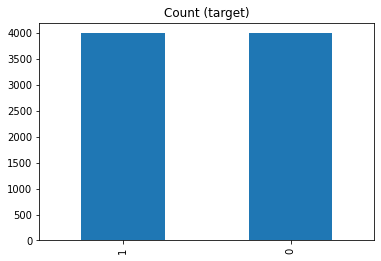

In [44]:
labels = ds.columns[:10]

X_smote = ds[labels]
y_smote = ds['stroke']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)

print(y_sm.value_counts())

y_sm.value_counts().plot(kind='bar', title='Count (target)');

## Feature Selection

### Correlation

In [45]:
df = pd.concat([X_sm, y_sm], axis=1)

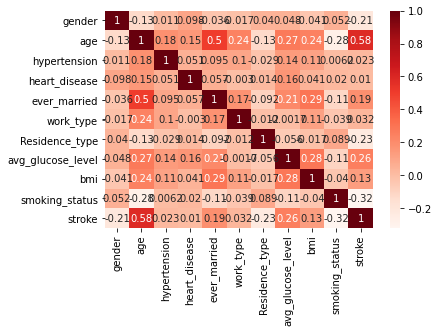

In [46]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

In [47]:
cor = df.corr()
cor_target = abs(cor['stroke'])
relevant_features = cor_target[cor_target > 0.5]
relevant_features

age       0.58329
stroke    1.00000
Name: stroke, dtype: float64

By using this method for feature selection, we can observe that there is only ine feature considered to be highly corrated. But let´s now use another method called Backward Elimination to see if it tell us something different.

### Backward Elimation - SMOTE

In [48]:
import statsmodels.api as sm
import bnlearn as bn

In [49]:
X = sm.add_constant(X_sm)

In [50]:
model = sm.OLS(y_sm,X).fit()
model.pvalues

const                4.440809e-03
gender               3.417056e-52
age                  0.000000e+00
hypertension         1.309137e-19
heart_disease        7.470603e-17
ever_married         2.691429e-48
work_type            3.154660e-22
Residence_type       2.461691e-67
avg_glucose_level    1.426606e-46
bmi                  8.737794e-01
smoking_status       9.476409e-58
dtype: float64

In [51]:
cols = list(X_sm.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X_sm[cols]
    X = sm.add_constant(X)
    model = sm.OLS(y_sm,X).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'smoking_status']


In [52]:
selected_features_BE.remove('ever_married')

In [53]:
X_sm = X_sm[cols]
X_sm.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'Residence_type', 'avg_glucose_level', 'smoking_status'],
      dtype='object')

# 3. Data preparation

In [54]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [56]:
import os
import warnings
#from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [57]:
normalization = lambda x:(x-x.min()) / (x.max()-x.min())
transformColumns2 = X_sm
X_sm = normalization(transformColumns2)

In [58]:
from sklearn.model_selection import train_test_split

### Splitting into train and test

In [59]:
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.25, random_state=0)
pd.DataFrame({"Train Row Count":[x_train.shape[0],y_train.shape[0]],
              "Test Row Count":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),5995,1999
Y (Target),5995,1999


In [60]:
y_train = y_train.values.ravel()

# 4. Modeling - SMOTE Oversampling

In [61]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test,y_pred_dtc)

In [62]:
# Logistic Regression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)
logr_acc = accuracy_score(y_test,y_pred_logr)

In [63]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)

In [64]:
# K Neighbors Classifier
knn = KNeighborsClassifier( metric='minkowski')
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

In [65]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

In [66]:
# Support Vector Machine
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
svm_acc = accuracy_score(y_test,y_pred_svm)

In [67]:
# Neural Network
nnc = MLPClassifier()
nnc.fit(x_train,y_train)
y_pred_nnc = nnc.predict(x_test)
nnc_acc = accuracy_score(y_test,y_pred_nnc)

In [68]:
# Xgboost Classifier
xgboast = xgb.XGBClassifier()
xgboast.fit(x_train, y_train)
xgboast = xgboast.score(x_test,y_test)

[23:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# 5. Evaluation

In [69]:
pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","K Neighbors Classifier","Random Ferest","Neural Network","SVM","Xgboost Classifier"],
              "Scores":[dtc_acc,logr_acc,gnb_acc,knn_acc,rfc_acc,nnc_acc,svm_acc,xgboast]})

,Algorithms,Scores
0,Decision Tree,0.899450
1,Logistic Regression,0.804902
2,Naive Bayes,0.795398
3,K Neighbors Classifier,0.872436
4,Random Ferest,0.918959
5,Neural Network,0.829415
6,SVM,0.814407
7,Xgboost Classifier,0.905953


In [70]:
# Cross validation test
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('K Neighbors Classifier', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Neural Network', MLPClassifier()))
models.append(('SVM', SVC()))
models.append(('Xgboost', XGBClassifier()))

In [71]:
# evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = X_sm.values, y_sm.values.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=10)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy":results_std})

[23:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Algorithm,Accuracy Mean,Accuracy
0,Decision Tree,0.901182,0.027343
1,Logistic Regression,0.805985,0.026531
2,Naive Bayes,0.790721,0.018100
3,K Neighbors Classifier,0.879041,0.030494
4,Random Forest,0.923200,0.030008
5,Neural Network,0.824129,0.036342
6,SVM,0.822002,0.035522
7,Xgboost,0.915192,0.027454


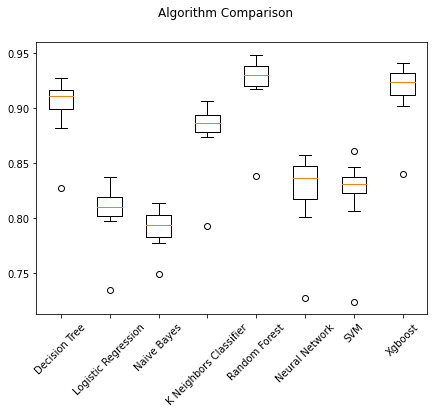

In [78]:
# boxplot algorithm comparison

fig = plt.figure(figsize=(7,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.xticks(rotation=45)

plt.show()

In [79]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,roc_auc_score,roc_curve

In [80]:
rfc = RandomForestClassifier()
model_name = 'RFC'
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

rfc_acc = accuracy_score(y_test,y_pred_rfc)
f1 = f1_score(y_test,y_pred_rfc)
rfc_auc = roc_auc_score(y_test,y_pred_rfc)


auc_dtc = roc_auc_score(y_test,y_pred_dtc)


RFC Validation Score:
Accuracy Score:0.917 F1 Score:0.920


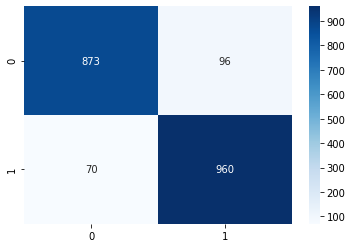

In [81]:
print(f'{model_name.upper()} Validation Score:\nAccuracy Score:{rfc_acc:.3f} F1 Score:{f1:.3f}')
mat = confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(mat,cmap='Blues',annot=True,fmt='g')
plt.show()

In [82]:
r_probs = [0 for _ in range(len(y_test))]

rf_probs = rfc.predict_proba(x_test)
rf_probs = rf_probs[:, 1]

dtc_probs = dtc.predict_proba(x_test)
dtc_probs = dtc_probs[:, 1]

In [83]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

dtc_auc = roc_auc_score(y_test, dtc_probs)

In [84]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)

Random (chance) Prediction: AUC = 0.500
Random Forest: AUC = 0.975


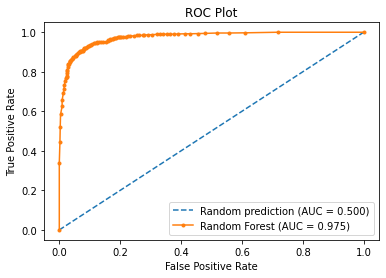

In [85]:
print('Random (chance) Prediction: AUC = %.3f' % (r_auc))
print('Random Forest: AUC = %.3f' % (rf_auc))

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUC = %0.3f)' % rf_auc)
#plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUC = %0.3f)' % dtc_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()